In [147]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, plot_confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [148]:
import seaborn as sns
sns.set()

In [149]:
df = pd.read_excel("/Users/michaelzhang/Desktop/pnet_features/pnet-glioma_sp_t1t2.xlsx")

In [150]:
df.head()

,path,subgroup,seg_id,id,institution,gender,age,t1_log-sigma-1-mm-3D_firstorder_10Percentile,t1_log-sigma-1-mm-3D_firstorder_90Percentile,t1_log-sigma-1-mm-3D_firstorder_Energy,...,t2_wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,t2_wavelet-LLL_glszm_LowGrayLevelZoneEmphasis,t2_wavelet-LLL_glszm_SizeZoneNonUniformity,t2_wavelet-LLL_glszm_SizeZoneNonUniformityNormalized,t2_wavelet-LLL_glszm_SmallAreaEmphasis,t2_wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,t2_wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,t2_wavelet-LLL_glszm_ZoneEntropy,t2_wavelet-LLL_glszm_ZonePercentage,t2_wavelet-LLL_glszm_ZoneVariance
0,glioma,gbm,SEG_CG_HGG-GBM_U_0001_t1--1,CG_HGG-GBM_U_0001,CG,F,215.15,-81.317188,52.088432,7.419751e+07,...,0.055566,0.000793,7161.758273,0.572483,0.784856,11492.221292,0.000394,8.111180,0.443979,332.667011
1,glioma,gbm,SEG_CG_HGG-GBM_U_0002_t1--2,CG_HGG-GBM_U_0002,CG,F,173.03,-7.566182,8.172598,6.790207e+06,...,0.212846,0.000455,5301.731773,0.323197,0.587892,2156.228766,0.000306,8.409433,0.209840,701.278242
2,glioma,gbm,SEG_CG_HGG-GBM_U_0004_t1--4,CG_HGG-GBM_U_0004,CG,F,125.95,-3.567419,7.906178,7.601416e+05,...,0.142862,0.001260,2421.581086,0.435380,0.685791,1561.312002,0.000963,7.738957,0.304734,707.466575
3,glioma,gbm,SEG_CG_HGG-GBM_U_0005_t1--5,CG_HGG-GBM_U_0005,CG,M,187.69,-21.205755,16.094303,2.224015e+06,...,0.009301,0.000868,2175.391514,0.456919,0.702930,2638.646357,0.000778,7.778781,0.407062,38.388005
4,glioma,gbm,SEG_CG_HGG-GBM_U_0006_t1--6,CG_HGG-GBM_U_0006,CG,F,178.75,-55.605650,39.201261,3.232483e+07,...,0.028004,0.000851,4260.799827,0.369220,0.630369,1946.390352,0.000543,8.191996,0.366955,36.107462


In [151]:
reduced_features = pd.read_excel("/Users/michaelzhang/Desktop/pnet_features/pnet-glioma_LASSO.xlsx")

In [152]:
reduced_features_list = reduced_features.loc[reduced_features['pnet_glioma'].isnull() == False, ['pnet_glioma']].values.tolist()

In [153]:
reduced_features_list = [item for sublist in reduced_features_list for item in sublist]

In [154]:
reduced_features_list

['age',
 't2_log-sigma-1-mm-3D_firstorder_Skewness',
 't2_wavelet-HLH_firstorder_Skewness',
 't2_wavelet-HLL_glcm_InverseVariance',
 't2_wavelet-LLL_firstorder_Skewness',
 't1_original_glcm_JointAverage',
 't1_wavelet-HLL_firstorder_Median',
 't2_original_glcm_Imc2',
 't2_wavelet-LLL_firstorder_Kurtosis',
 't1_log-sigma-5-mm-3D_firstorder_Mean',
 't1_wavelet-LHL_firstorder_Median',
 't2_wavelet-HHH_firstorder_Kurtosis']

In [155]:
target = df["path"]

In [156]:
target.value_counts()

glioma    188
pnet       50
Name: path, dtype: int64

In [157]:
#Marking 0 as glioma and 1 pnet
mapping_dict = {0: 'glioma', 1: 'pnet'} ##
target = target.map(dict(glioma = 0, pnet = 1)) ##

In [158]:
features_after_lasso = df[reduced_features_list]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(features_after_lasso, target, 
                                                    test_size = 0.25, random_state = 42)

In [160]:
y_train.value_counts()

0    139
1     39
Name: path, dtype: int64

In [161]:
y_test.value_counts()

0    49
1    11
Name: path, dtype: int64

In [162]:
NIR = 52/(153+52)
NIR

0.25365853658536586

# Resampling to Correct for Imbalance

In [163]:
X = pd.concat([X_train, y_train], axis = 1)
X_0 = X[X['path'] == 0]
X_1 = X[X['path'] == 1]

In [164]:
upsampled_1 = resample(X_1, replace = True, n_samples = len(X_0), random_state = 42)
upsampled = pd.concat([upsampled_1, X_0])
upsampled = upsampled.sample(frac = 1, random_state = 42)

In [165]:
X_train = upsampled.iloc[:, :-1]
y_train = upsampled.iloc[:, -1]

In [166]:
y_train.value_counts()

1    139
0    139
Name: path, dtype: int64

# Standardizing Features

In [167]:
names = X_train.columns
scaler = preprocessing.StandardScaler()

In [168]:
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = names)

In [169]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = names)

In [170]:
def create_ci(bootstrapped_scores, name):
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
    
    print("95% Confidence interval for the {} score: [{:0.4f} - {:0.4}]".format(name, 
    confidence_lower, confidence_upper))

In [171]:
def specificity_score(y_true, y_pred):
    TN = 0
    FP = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i] == 0:
            TN += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            FP += 1
    
    return TN / (TN + FP)

In [172]:
def positive_pv_score(y_true, y_pred):
    TP = 0
    FP = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i] == 1:
            TP += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            FP += 1
    
    return TP/(TP+FP)

In [173]:
def negative_pv_score(y_true, y_pred):
    TN = 0
    FN = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i] == 0:
            TN += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            FN += 1
    
    return TN/(TN+FN)        

# SVM

### Grid Search for Hyperparameters

In [174]:
svm_model = svm.SVC()
grid_param = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid', 'linear']
}

svm_grid = GridSearchCV(estimator=svm_model,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [175]:
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             scoring='accuracy')

In [176]:
print(svm_grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


### Model Performance

In [177]:
svm_model = svm.SVC(C = 1, gamma = 1, kernel = 'rbf', probability = True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [178]:
y_train_pred = svm_model.predict(X_train)

In [179]:
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))
print("Specificity Score: " + str(specificity_score(y_test.to_numpy(), y_pred)))
print("Precision: " + str(precision_score(y_test, y_pred)))
print("Recall: " + str(recall_score(y_test, y_pred)))
print("F1 Score: " + str(f1_score(y_test, y_pred)))

#print("PPV Score: " + str(positive_pv_score(y_test.to_numpy(), y_pred)))
#print("NPV Score: " + str(negative_pv_score(y_test.to_numpy(), y_pred)))


Accuracy Score: 0.8166666666666667
Specificity Score: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/Users/michaelzhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [180]:
svm_probs = svm_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
auc = roc_auc_score(y_test, svm_probs)
print("AUC: " + str(auc))

AUC: 0.7198515769944341


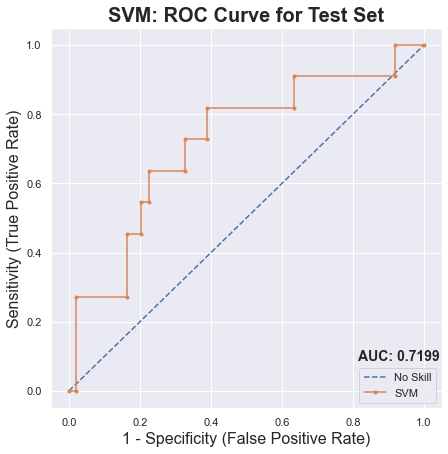

In [181]:
plt.figure(figsize=(7, 7)) ##

ns_preds = [0 for _ in range(len(y_test))]

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_preds)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='SVM')
plt.xlabel('1 - Specificity (False Positive Rate)',fontsize=16)
plt.ylabel('Sensitivity (True Positive Rate)',fontsize=16)

plt.legend(loc='lower right')
plt.title('SVM: ROC Curve for Test Set', fontsize=20, fontweight="semibold")
short_auc = round(auc,4)
plt.text(.93,.1, "AUC: " + str(short_auc), 
        horizontalalignment="center", verticalalignment="center",
        fontsize=14, fontweight="semibold")
    
plt.show()

In [182]:
#sns.reset_orig()

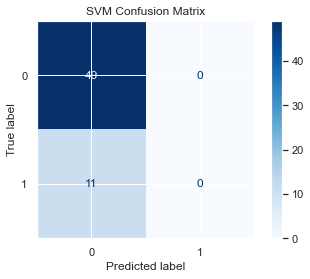

In [183]:
matrix = plot_confusion_matrix(svm_model, X_test, y_test,
                               cmap=plt.cm.Blues)
plt.title('SVM Confusion Matrix')
plt.show(matrix)
plt.show()

In [184]:
#n_bootstraps = 2000
#rng_seed = 42  # control reproducibility
#bootstrapped_auc_scores = []
#bootstrapped_acc_scores = []
#bootstrapped_spec_scores = []
#bootstrapped_prec_scores = []
#bootstrapped_rec_scores = []
#bootstrapped_f1_scores = []
#bootstrapped_ppv_scores = []
#bootstrapped_npv_scores = []

#rng = np.random.RandomState(rng_seed)
#for i in range(n_bootstraps):
#    # bootstrap by sampling with replacement on the prediction indices
#    indices = rng.randint(0, len(svm_probs), len(svm_probs))
#    if len(np.unique(y_test.to_numpy()[indices])) < 2:
#        # We need at least one positive and one negative sample for ROC AUC
#        # to be defined: reject the sample
#        continue

#    auc_score = roc_auc_score(y_test.to_numpy()[indices], svm_probs[indices])
#    acc_score = accuracy_score(y_test.to_numpy()[indices], y_pred[indices])
#    spec_score = specificity_score(y_test.to_numpy()[indices], y_pred[indices])
#    prec_score = precision_score(y_test.to_numpy()[indices], y_pred[indices])
#    rec_score = recall_score(y_test.to_numpy()[indices], y_pred[indices])
#    f_one_score = f1_score(y_test.to_numpy()[indices].astype('float64'), y_pred[indices].astype('float64'))
#    ppv_score = positive_pv_score(y_test.to_numpy()[indices], y_pred[indices])
#    npv_score = negative_pv_score(y_test.to_numpy()[indices], y_pred[indices])

#    bootstrapped_auc_scores.append(auc_score)
#    bootstrapped_acc_scores.append(acc_score)
#    bootstrapped_spec_scores.append(spec_score)
#    bootstrapped_prec_scores.append(prec_score)
#    bootstrapped_rec_scores.append(rec_score)
#    bootstrapped_f1_scores.append(f_one_score)
#    bootstrapped_ppv_scores.append(ppv_score)
#    bootstrapped_npv_scores.append(npv_score)

In [185]:
#plt.hist(bootstrapped_auc_scores, bins=50)
#plt.title('Histogram of the bootstrapped ROC AUC scores')
#plt.show()

In [186]:
#create_ci(bootstrapped_auc_scores, "AUC")
#create_ci(bootstrapped_acc_scores, "Accuracy")
#create_ci(bootstrapped_spec_scores, "Specificity")
#create_ci(bootstrapped_prec_scores, "Precision")
#create_ci(bootstrapped_rec_scores, "Recall")
#create_ci(bootstrapped_f1_scores, "F1")
#create_ci(bootstrapped_ppv_scores, "PPV")
#create_ci(bootstrapped_npv_scores, "NPV")

# Logistic Regression

### Grid Search for Hyperparameters

In [187]:
lr_model = LogisticRegression()
grid_param = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [10, 1, 0.1, 0.01, 0.001]
}

lr_grid = GridSearchCV(estimator=lr_model,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [188]:
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 1, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [189]:
print(lr_grid.best_params_)

{'C': 1, 'penalty': 'l2'}


### Model Performance

In [190]:
lr_model = LogisticRegression(penalty = 'l2', C = 1)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [191]:
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))
print("Specificity Score: " + str(specificity_score(y_test.to_numpy(), y_pred)))
print("Precision: " + str(precision_score(y_test, y_pred)))
print("Recall: " + str(recall_score(y_test, y_pred)))
print("F1 Score: " + str(f1_score(y_test, y_pred)))

print("PPV Score: " + str(positive_pv_score(y_test.to_numpy(), y_pred)))
print("NPV Score: " + str(negative_pv_score(y_test.to_numpy(), y_pred)))


Accuracy Score: 0.7666666666666667
Specificity Score: 0.7755102040816326
Precision: 0.42105263157894735
Recall: 0.7272727272727273
F1 Score: 0.5333333333333333
PPV Score: 0.42105263157894735
NPV Score: 0.926829268292683


In [192]:
lr_probs = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
auc = roc_auc_score(y_test, lr_probs)
print("AUC: " + str(auc))

AUC: 0.7903525046382189


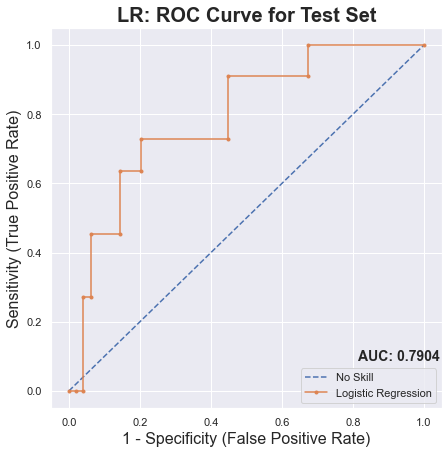

In [193]:
plt.figure(figsize=(7, 7)) ##

ns_preds = [0 for _ in range(len(y_test))]

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_preds)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.xlabel('1 - Specificity (False Positive Rate)',fontsize=16)
plt.ylabel('Sensitivity (True Positive Rate)',fontsize=16)

plt.legend(loc='lower right')
plt.title('LR: ROC Curve for Test Set', fontsize=20, fontweight="semibold")
short_auc = round(auc,4)
plt.text(.93,.1, "AUC: " + str(short_auc), 
        horizontalalignment="center", verticalalignment="center",
        fontsize=14, fontweight="semibold")
    
plt.show()

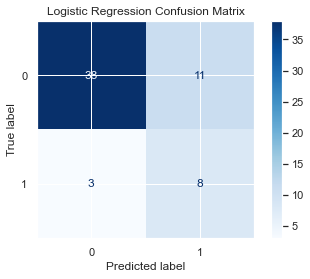

In [194]:
matrix = plot_confusion_matrix(lr_model, X_test, y_test,
                               cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show(matrix)
plt.show()

In [195]:
#n_bootstraps = 2000
#rng_seed = 42  # control reproducibility
#bootstrapped_auc_scores = []
#bootstrapped_acc_scores = []
#bootstrapped_spec_scores = []
#bootstrapped_prec_scores = []
#bootstrapped_rec_scores = []
#bootstrapped_f1_scores = []
#bootstrapped_ppv_scores = []
#bootstrapped_npv_scores = []

#rng = np.random.RandomState(rng_seed)
#for i in range(n_bootstraps):
#    # bootstrap by sampling with replacement on the prediction indices
#    indices = rng.randint(0, len(svm_probs), len(svm_probs))
#    if len(np.unique(y_test.to_numpy()[indices])) < 2:
#        # We need at least one positive and one negative sample for ROC AUC
#        # to be defined: reject the sample
#        continue

#    auc_score = roc_auc_score(y_test.to_numpy()[indices], svm_probs[indices])
#    acc_score = accuracy_score(y_test.to_numpy()[indices], y_pred[indices])
#    spec_score = specificity_score(y_test.to_numpy()[indices], y_pred[indices])
#    prec_score = precision_score(y_test.to_numpy()[indices], y_pred[indices])
#    rec_score = recall_score(y_test.to_numpy()[indices], y_pred[indices])
#    f_one_score = f1_score(y_test.to_numpy()[indices].astype('float64'), y_pred[indices].astype('float64'))
#    ppv_score = positive_pv_score(y_test.to_numpy()[indices], y_pred[indices])
#    npv_score = negative_pv_score(y_test.to_numpy()[indices], y_pred[indices])

#    bootstrapped_auc_scores.append(auc_score)
#    bootstrapped_acc_scores.append(acc_score)
#    bootstrapped_spec_scores.append(spec_score)
#    bootstrapped_prec_scores.append(prec_score)
#    bootstrapped_rec_scores.append(rec_score)
#    bootstrapped_f1_scores.append(f_one_score)
#    bootstrapped_ppv_scores.append(ppv_score)
#    bootstrapped_npv_scores.append(npv_score)

In [196]:
#create_ci(bootstrapped_auc_scores, "AUC")
#create_ci(bootstrapped_acc_scores, "Accuracy")
#create_ci(bootstrapped_spec_scores, "Specificity")
#create_ci(bootstrapped_prec_scores, "Precision")
#create_ci(bootstrapped_rec_scores, "Recall")
#create_ci(bootstrapped_f1_scores, "F1")
#create_ci(bootstrapped_ppv_scores, "PPV")
#create_ci(bootstrapped_npv_scores, "NPV")

In [197]:
#feature_labels_dict = {'t1_original_shape_Elongation': 'T1 Original Shape Elongation', 
#                      't2_log-sigma-5-mm-3D_firstorder_90Percentile': 'T2 Log Sigma 5mm 3D 90th Percentile (1st Order)',
#                          't2_original_shape_Elongation': 'T2 Original Shape Elongation',
#                          't2_original_shape_Flatness': 'T2 Original Shape Flatness',
#                      't2_wavelet-LLL_glcm_Idmn': 'T2 Wavelet LLL Glcm Idmn',
#                      't2_wavelet-HLL_firstorder_Kurtosis': 'T2 Wavelet HLL Kurtosis (1st Order)',}

In [198]:
sns.set()

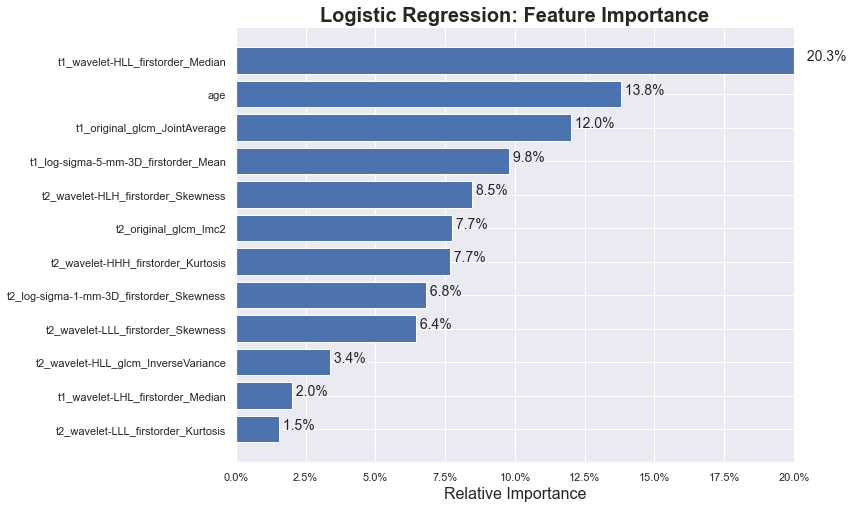

In [199]:
feature_names = X_test.columns.to_list()
importances = lr_model.coef_[0]
importances = np.abs(importances) / np.sum(np.abs(importances))

indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Logistic Regression: Feature Importance',fontsize=20, fontweight='semibold')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.xlim(0, 0.20)
for index, value in enumerate(importances[indices]):
    plt.text(value, index, " {:.1%}".format(value), fontsize=14)
#plt.yticks(range(len(indices)), [feature_labels_dict[feature_names[i]] for i in indices],fontsize=14)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance',fontsize=16)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()

In [200]:
#sns.reset_orig()

# KNN

### Grid Search for Hyperparameters

In [201]:
knn_model = KNeighborsClassifier()
grid_param = {'n_neighbors': [3, 5, 7, 9]
}

knn_grid = GridSearchCV(estimator=knn_model,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [202]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='accuracy')

In [203]:
print(knn_grid.best_params_)

{'n_neighbors': 3}


### Model Performance

In [204]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [205]:
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))
print("Specificity Score: " + str(specificity_score(y_test.to_numpy(), y_pred)))
print("Precision: " + str(precision_score(y_test, y_pred)))
print("Recall: " + str(recall_score(y_test, y_pred)))
print("F1 Score: " + str(f1_score(y_test, y_pred)))

print("PPV Score: " + str(positive_pv_score(y_test.to_numpy(), y_pred)))
print("NPV Score: " + str(negative_pv_score(y_test.to_numpy(), y_pred)))


Accuracy Score: 0.7333333333333333
Specificity Score: 0.7346938775510204
Precision: 0.38095238095238093
Recall: 0.7272727272727273
F1 Score: 0.5
PPV Score: 0.38095238095238093
NPV Score: 0.9230769230769231


In [206]:
knn_probs = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
auc = roc_auc_score(y_test, knn_probs)
print("AUC: " + str(auc))

AUC: 0.725417439703154


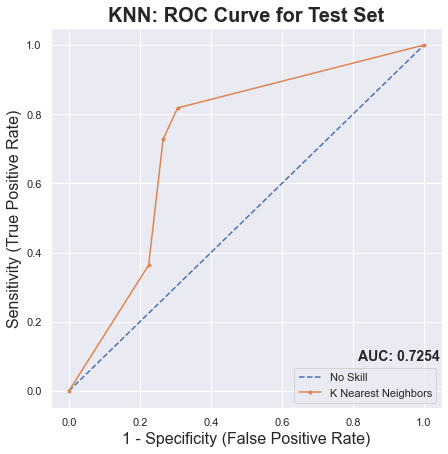

In [207]:
plt.figure(figsize=(7, 7)) ##

ns_preds = [0 for _ in range(len(y_test))]

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_preds)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='K Nearest Neighbors')
plt.xlabel('1 - Specificity (False Positive Rate)',fontsize=16)
plt.ylabel('Sensitivity (True Positive Rate)',fontsize=16)

plt.legend(loc='lower right')
plt.title('KNN: ROC Curve for Test Set', fontsize=20, fontweight="semibold")
short_auc = round(auc,4)
plt.text(.93,.1, "AUC: " + str(short_auc), 
        horizontalalignment="center", verticalalignment="center",
        fontsize=14, fontweight="semibold")
    
plt.show()

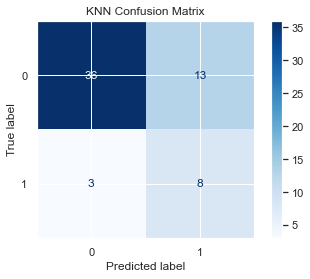

In [208]:
matrix = plot_confusion_matrix(knn_model, X_test, y_test,
                               cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix')
plt.show(matrix)
plt.show()

In [209]:
#n_bootstraps = 2000
#rng_seed = 42  # control reproducibility
#bootstrapped_auc_scores = []
#bootstrapped_acc_scores = []
#bootstrapped_spec_scores = []
#bootstrapped_prec_scores = []
#bootstrapped_rec_scores = []
#bootstrapped_f1_scores = []
#bootstrapped_ppv_scores = []
#bootstrapped_npv_scores = []

#rng = np.random.RandomState(rng_seed)
#for i in range(n_bootstraps):
#    # bootstrap by sampling with replacement on the prediction indices
#    indices = rng.randint(0, len(svm_probs), len(svm_probs))
#    if len(np.unique(y_test.to_numpy()[indices])) < 2:
#        # We need at least one positive and one negative sample for ROC AUC
#        # to be defined: reject the sample
#        continue

#    auc_score = roc_auc_score(y_test.to_numpy()[indices], svm_probs[indices])
#    acc_score = accuracy_score(y_test.to_numpy()[indices], y_pred[indices])
#    spec_score = specificity_score(y_test.to_numpy()[indices], y_pred[indices])
#    prec_score = precision_score(y_test.to_numpy()[indices], y_pred[indices])
#    rec_score = recall_score(y_test.to_numpy()[indices], y_pred[indices])
#    f_one_score = f1_score(y_test.to_numpy()[indices].astype('float64'), y_pred[indices].astype('float64'))
#    ppv_score = positive_pv_score(y_test.to_numpy()[indices], y_pred[indices])
#    npv_score = negative_pv_score(y_test.to_numpy()[indices], y_pred[indices])

#    bootstrapped_auc_scores.append(auc_score)
#    bootstrapped_acc_scores.append(acc_score)
#    bootstrapped_spec_scores.append(spec_score)
#    bootstrapped_prec_scores.append(prec_score)
#    bootstrapped_rec_scores.append(rec_score)
#    bootstrapped_f1_scores.append(f_one_score)
#    bootstrapped_ppv_scores.append(ppv_score)
#    bootstrapped_npv_scores.append(npv_score)

In [210]:
#create_ci(bootstrapped_auc_scores, "AUC")
#create_ci(bootstrapped_acc_scores, "Accuracy")
#create_ci(bootstrapped_spec_scores, "Specificity")
#create_ci(bootstrapped_prec_scores, "Precision")
#create_ci(bootstrapped_rec_scores, "Recall")
#create_ci(bootstrapped_f1_scores, "F1")
#create_ci(bootstrapped_ppv_scores, "PPV")
#create_ci(bootstrapped_npv_scores, "NPV")

# Random Forest

### Grid Search for Hyperparameters
 

In [211]:
rf_model = RandomForestClassifier(random_state = 42)
grid_param = {'n_estimators': [None, 50, 100, 200, 300],
              'max_depth': [1, 2, 3, 4]
}

rf_grid = GridSearchCV(estimator=rf_model,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [212]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [None, 50, 100, 200, 300]},
             scoring='accuracy')

In [213]:
print(rf_grid.best_params_)

{'max_depth': 4, 'n_estimators': 50}


### Model Performance

In [214]:
rf_model = RandomForestClassifier(max_depth = 4, n_estimators = 50, random_state = 42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [215]:
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))
print("Specificity Score: " + str(specificity_score(y_test.to_numpy(), y_pred)))
print("Precision: " + str(precision_score(y_test, y_pred)))
print("Recall: " + str(recall_score(y_test, y_pred)))
print("F1 Score: " + str(f1_score(y_test, y_pred)))

print("PPV Score: " + str(positive_pv_score(y_test.to_numpy(), y_pred)))
print("NPV Score: " + str(negative_pv_score(y_test.to_numpy(), y_pred)))


Accuracy Score: 0.8
Specificity Score: 0.8367346938775511
Precision: 0.4666666666666667
Recall: 0.6363636363636364
F1 Score: 0.5384615384615385
PPV Score: 0.4666666666666667
NPV Score: 0.9111111111111111


In [216]:
rf_probs = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
auc = roc_auc_score(y_test, rf_probs)
print("AUC: " + str(auc))

AUC: 0.8701298701298701


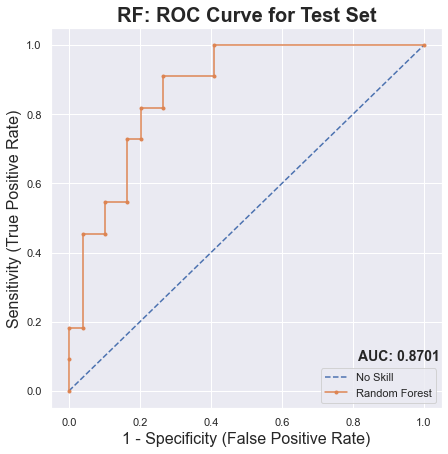

In [217]:
plt.figure(figsize=(7, 7)) ##

ns_preds = [0 for _ in range(len(y_test))]

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_preds)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.xlabel('1 - Specificity (False Positive Rate)',fontsize=16)
plt.ylabel('Sensitivity (True Positive Rate)',fontsize=16)

plt.legend(loc='lower right')
plt.title('RF: ROC Curve for Test Set', fontsize=20, fontweight="semibold")
short_auc = round(auc,4)
plt.text(.93,.1, "AUC: " + str(short_auc), 
        horizontalalignment="center", verticalalignment="center",
        fontsize=14, fontweight="semibold")
    
plt.show()

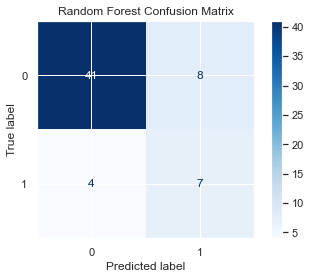

In [218]:
matrix = plot_confusion_matrix(rf_model, X_test, y_test,
                               cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show(matrix)
plt.show()

In [219]:
#n_bootstraps = 2000
#rng_seed = 42  # control reproducibility
#bootstrapped_auc_scores = []
#bootstrapped_acc_scores = []
#bootstrapped_spec_scores = []
#bootstrapped_prec_scores = []
#bootstrapped_rec_scores = []
#bootstrapped_f1_scores = []
#bootstrapped_ppv_scores = []
#bootstrapped_npv_scores = []

#rng = np.random.RandomState(rng_seed)
#for i in range(n_bootstraps):
#    # bootstrap by sampling with replacement on the prediction indices
#    indices = rng.randint(0, len(svm_probs), len(svm_probs))
#    if len(np.unique(y_test.to_numpy()[indices])) < 2:
#        # We need at least one positive and one negative sample for ROC AUC
#        # to be defined: reject the sample
#        continue

#    auc_score = roc_auc_score(y_test.to_numpy()[indices], svm_probs[indices])
#    acc_score = accuracy_score(y_test.to_numpy()[indices], y_pred[indices])
#    spec_score = specificity_score(y_test.to_numpy()[indices], y_pred[indices])
#    prec_score = precision_score(y_test.to_numpy()[indices], y_pred[indices])
#    rec_score = recall_score(y_test.to_numpy()[indices], y_pred[indices])
#    f_one_score = f1_score(y_test.to_numpy()[indices].astype('float64'), y_pred[indices].astype('float64'))
#    ppv_score = positive_pv_score(y_test.to_numpy()[indices], y_pred[indices])
#    npv_score = negative_pv_score(y_test.to_numpy()[indices], y_pred[indices])

#    bootstrapped_auc_scores.append(auc_score)
#    bootstrapped_acc_scores.append(acc_score)
#    bootstrapped_spec_scores.append(spec_score)
#    bootstrapped_prec_scores.append(prec_score)
#    bootstrapped_rec_scores.append(rec_score)
#    bootstrapped_f1_scores.append(f_one_score)
#    bootstrapped_ppv_scores.append(ppv_score)
#    bootstrapped_npv_scores.append(npv_score)

In [220]:
#create_ci(bootstrapped_auc_scores, "AUC")
#create_ci(bootstrapped_acc_scores, "Accuracy")
#create_ci(bootstrapped_spec_scores, "Specificity")
#create_ci(bootstrapped_prec_scores, "Precision")
#create_ci(bootstrapped_rec_scores, "Recall")
#create_ci(bootstrapped_f1_scores, "F1")
#create_ci(bootstrapped_ppv_scores, "PPV")
#create_ci(bootstrapped_npv_scores, "NPV")

In [221]:
sns.set()

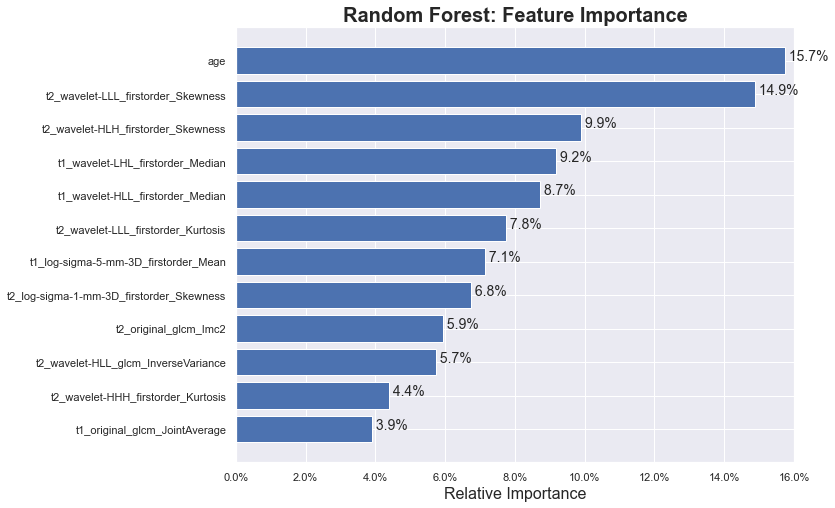

In [222]:
feature_names = X_test.columns.to_list()
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Random Forest: Feature Importance',fontsize=20, fontweight='semibold')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.xlim(0, 0.16)
for index, value in enumerate(importances[indices]):
    plt.text(value, index, " {:.1%}".format(value), fontsize=14)
#plt.yticks(range(len(indices)), [feature_labels_dict[feature_names[i]] for i in indices],fontsize=14)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance',fontsize=16)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()

In [223]:
#sns.reset_orig()

# XGBoost

### Grid Search for Hyperparameters

In [224]:
xgb_model = XGBClassifier(random_state = 42)
grid_param = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth': [3, 4, 5, 6]
}

xgb_grid = GridSearchCV(estimator=xgb_model,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [225]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [226]:
print(xgb_grid.best_params_)

{'learning_rate': 0.2, 'max_depth': 3}


### Model Performance

In [227]:
xgb_model = XGBClassifier(learning_rate = 0.2, max_depth = 3, random_state = 42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [228]:
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))
print("Specificity Score: " + str(specificity_score(y_test.to_numpy(), y_pred)))
print("Precision: " + str(precision_score(y_test, y_pred)))
print("Recall: " + str(recall_score(y_test, y_pred)))
print("F1 Score: " + str(f1_score(y_test, y_pred)))

print("PPV Score: " + str(positive_pv_score(y_test.to_numpy(), y_pred)))
print("NPV Score: " + str(negative_pv_score(y_test.to_numpy(), y_pred)))


Accuracy Score: 0.8833333333333333
Specificity Score: 0.9387755102040817
Precision: 0.7
Recall: 0.6363636363636364
F1 Score: 0.6666666666666666
PPV Score: 0.7
NPV Score: 0.92


In [229]:
xgb_probs = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_probs)
auc = roc_auc_score(y_test, xgb_probs)
print("AUC: " + str(auc))

AUC: 0.8998144712430427


In [230]:
f = 'gain'
xgb_model.get_booster().get_score(importance_type = f)

{'age': 2.6898630938728716,
 't2_wavelet-LLL_firstorder_Skewness': 5.547245458409091,
 't2_wavelet-HLH_firstorder_Skewness': 2.491070847161701,
 't1_wavelet-HLL_firstorder_Median': 3.398581512491667,
 't2_log-sigma-1-mm-3D_firstorder_Skewness': 1.6098547367925005,
 't2_original_glcm_Imc2': 2.1490208055153843,
 't2_wavelet-HLL_glcm_InverseVariance': 2.2743868857058827,
 't1_log-sigma-5-mm-3D_firstorder_Mean': 2.213436380648649,
 't2_wavelet-LLL_firstorder_Kurtosis': 1.3651056760727278,
 't1_wavelet-LHL_firstorder_Median': 1.170291374640425,
 't1_original_glcm_JointAverage': 0.9878109496874999,
 't2_wavelet-HHH_firstorder_Kurtosis': 0.6895862836296296}

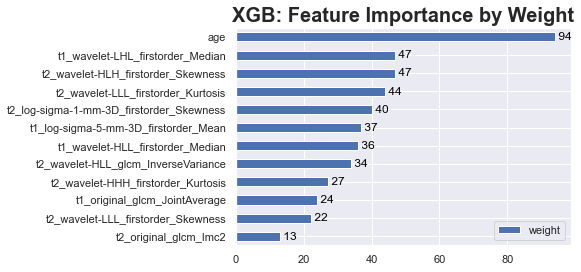

In [231]:
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["weight"]).sort_values(by = "weight", ascending=True)
data.plot(kind='barh'); #semi colon to hide AxesSubplot
plt.title('XGB: Feature Importance by Weight', fontsize = 20, fontweight='semibold')

for i, v in enumerate(sorted(values)):
    plt.text(v, i, " " + str(v), color='black', va = 'center')

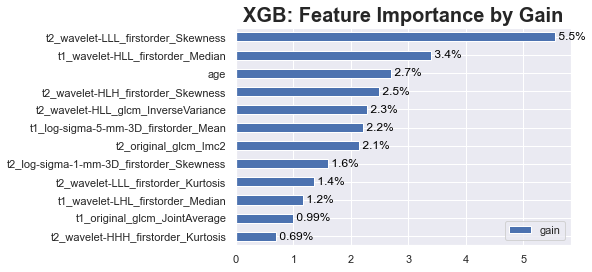

In [232]:
feature_important = xgb_model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["gain"]).sort_values(by = "gain", ascending=True)
data.plot(kind='barh'); #semi colon to hide AxesSubplot
plt.title('XGB: Feature Importance by Gain', fontsize = 20, fontweight='semibold')

for i, v in enumerate(sorted(values)):
    plt.text(v, i, " {:.2}%".format(v), fontsize=12, color='black', va = 'center')


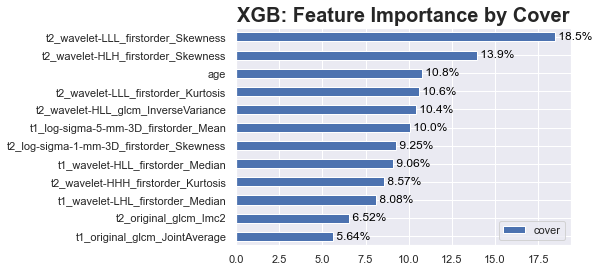

In [233]:
feature_important = xgb_model.get_booster().get_score(importance_type='cover')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["cover"]).sort_values(by = "cover", ascending=True)
data.plot(kind='barh'); #semi colon to hide AxesSubplot
plt.title('XGB: Feature Importance by Cover', fontsize = 20, fontweight='semibold')

for i, v in enumerate(sorted(values)):
    plt.text(v, i, " {:.3}%".format(v), fontsize=12, color='black', va = 'center')

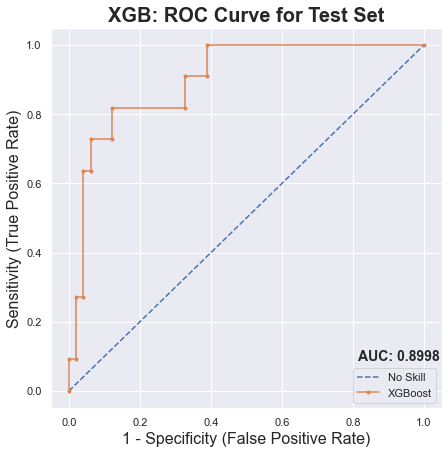

In [234]:
plt.figure(figsize=(7, 7)) ##

ns_preds = [0 for _ in range(len(y_test))]

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_preds)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='XGBoost')
plt.xlabel('1 - Specificity (False Positive Rate)',fontsize=16)
plt.ylabel('Sensitivity (True Positive Rate)',fontsize=16)

plt.legend(loc='lower right')
plt.title('XGB: ROC Curve for Test Set', fontsize=20, fontweight="semibold")
short_auc = round(auc,4)
plt.text(.93,.1, "AUC: " + str(short_auc), 
        horizontalalignment="center", verticalalignment="center",
        fontsize=14, fontweight="semibold")
    
plt.show()

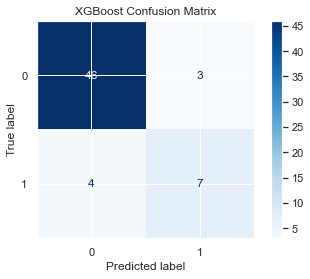

In [235]:
matrix = plot_confusion_matrix(xgb_model, X_test, y_test,
                               cmap=plt.cm.Blues)
plt.title('XGBoost Confusion Matrix')
plt.show(matrix)
plt.show()

In [236]:
#n_bootstraps = 2000
#rng_seed = 42  # control reproducibility
#bootstrapped_auc_scores = []
#bootstrapped_acc_scores = []
#bootstrapped_spec_scores = []
#bootstrapped_prec_scores = []
#bootstrapped_rec_scores = []
#bootstrapped_f1_scores = []
#bootstrapped_ppv_scores = []
#bootstrapped_npv_scores = []

#rng = np.random.RandomState(rng_seed)
#for i in range(n_bootstraps):
#    # bootstrap by sampling with replacement on the prediction indices
#    indices = rng.randint(0, len(svm_probs), len(svm_probs))
#    if len(np.unique(y_test.to_numpy()[indices])) < 2:
#        # We need at least one positive and one negative sample for ROC AUC
#        # to be defined: reject the sample
#        continue

#    auc_score = roc_auc_score(y_test.to_numpy()[indices], svm_probs[indices])
#    acc_score = accuracy_score(y_test.to_numpy()[indices], y_pred[indices])
#    spec_score = specificity_score(y_test.to_numpy()[indices], y_pred[indices])
#    prec_score = precision_score(y_test.to_numpy()[indices], y_pred[indices])
#    rec_score = recall_score(y_test.to_numpy()[indices], y_pred[indices])
#    f_one_score = f1_score(y_test.to_numpy()[indices].astype('float64'), y_pred[indices].astype('float64'))
#    ppv_score = positive_pv_score(y_test.to_numpy()[indices], y_pred[indices])
#    npv_score = negative_pv_score(y_test.to_numpy()[indices], y_pred[indices])

#    bootstrapped_auc_scores.append(auc_score)
#    bootstrapped_acc_scores.append(acc_score)
#    bootstrapped_spec_scores.append(spec_score)
#    bootstrapped_prec_scores.append(prec_score)
#    bootstrapped_rec_scores.append(rec_score)
#    bootstrapped_f1_scores.append(f_one_score)
#    bootstrapped_ppv_scores.append(ppv_score)
#    bootstrapped_npv_scores.append(npv_score)

In [237]:
#create_ci(bootstrapped_auc_scores, "AUC")
#create_ci(bootstrapped_acc_scores, "Accuracy")
#create_ci(bootstrapped_spec_scores, "Specificity")
#create_ci(bootstrapped_prec_scores, "Precision")
#create_ci(bootstrapped_rec_scores, "Recall")
#create_ci(bootstrapped_f1_scores, "F1")
#create_ci(bootstrapped_ppv_scores, "PPV")
#create_ci(bootstrapped_npv_scores, "NPV")

In [238]:
sns.set()

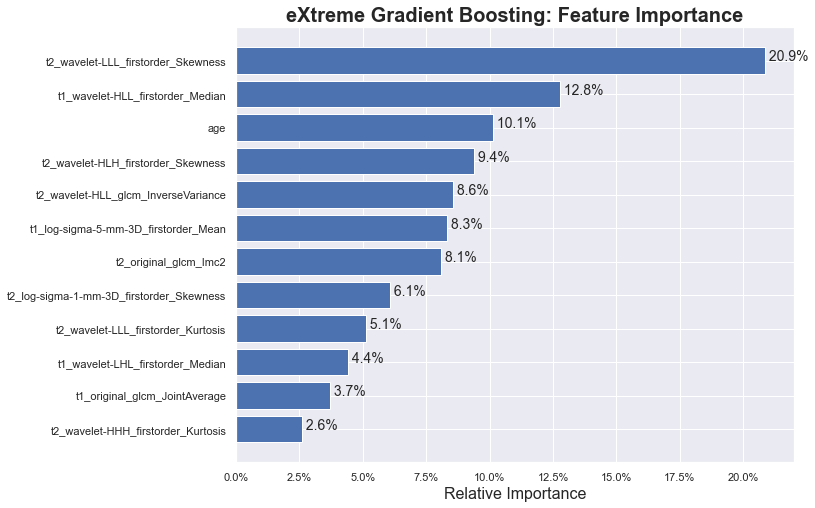

In [239]:
feature_names = X_test.columns.to_list()
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('eXtreme Gradient Boosting: Feature Importance',fontsize=20, fontweight='semibold')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.xlim(0, 0.22)
for index, value in enumerate(importances[indices]):
    plt.text(value, index, " {:.1%}".format(value), fontsize=14)
#plt.yticks(range(len(indices)), [feature_labels_dict[feature_names[i]] for i in indices],fontsize=14)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance',fontsize=16)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()

In [240]:
#sns.reset_orig()

# Neural Net

### Grid Search for Hyperparameters

In [241]:
nn_model = MLPClassifier(max_iter = 2000, random_state = 42)
grid_param = {'hidden_layer_sizes': [(100, 100, 50), (50, 100, 50), (100, 50, 100)],
              'learning_rate': ['constant', 'invscaling', 'adaptive']
}

nn_grid = GridSearchCV(estimator=nn_model,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [242]:
nn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=2000, random_state=42),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(100, 100, 50), (50, 100, 50),
                                                (100, 50, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']},
             scoring='accuracy')

In [243]:
print(nn_grid.best_params_)

{'hidden_layer_sizes': (100, 100, 50), 'learning_rate': 'constant'}


### Model Performance

In [244]:
nn_model = MLPClassifier(hidden_layer_sizes = (100, 100, 50), learning_rate = 'constant', 
                         max_iter = 2000, random_state = 42)
nn_model.fit(X_train, y_train)
y_pred = nn_model.predict(X_test)

In [245]:
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))
print("Specificity Score: " + str(specificity_score(y_test.to_numpy(), y_pred)))
print("Precision: " + str(precision_score(y_test, y_pred)))
print("Recall: " + str(recall_score(y_test, y_pred)))
print("F1 Score: " + str(f1_score(y_test, y_pred)))

print("PPV Score: " + str(positive_pv_score(y_test.to_numpy(), y_pred)))
print("NPV Score: " + str(negative_pv_score(y_test.to_numpy(), y_pred)))


Accuracy Score: 0.7833333333333333
Specificity Score: 0.7959183673469388
Precision: 0.4444444444444444
Recall: 0.7272727272727273
F1 Score: 0.5517241379310345
PPV Score: 0.4444444444444444
NPV Score: 0.9285714285714286


In [246]:
nn_probs = nn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, nn_probs)
auc = roc_auc_score(y_test, nn_probs)
print("AUC: " + str(auc))

AUC: 0.8218923933209648


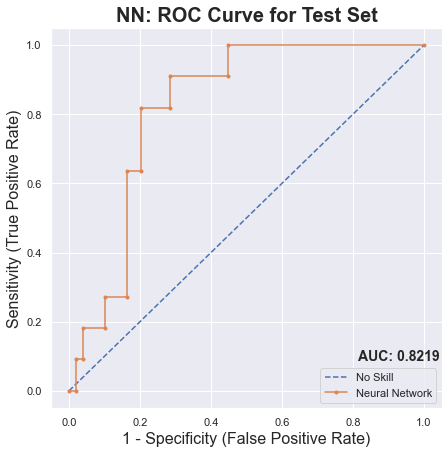

In [247]:
plt.figure(figsize=(7, 7)) ##

ns_preds = [0 for _ in range(len(y_test))]

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_preds)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Neural Network')
plt.xlabel('1 - Specificity (False Positive Rate)',fontsize=16)
plt.ylabel('Sensitivity (True Positive Rate)',fontsize=16)

plt.legend(loc='lower right')
plt.title('NN: ROC Curve for Test Set', fontsize=20, fontweight="semibold")
short_auc = round(auc,4)
plt.text(.93,.1, "AUC: " + str(short_auc), 
        horizontalalignment="center", verticalalignment="center",
        fontsize=14, fontweight="semibold")
    
plt.show()

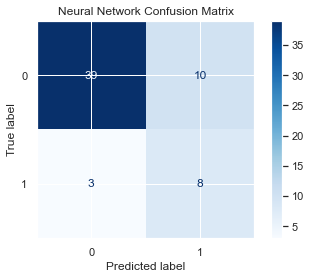

In [248]:
matrix = plot_confusion_matrix(nn_model, X_test, y_test,
                               cmap=plt.cm.Blues)
plt.title('Neural Network Confusion Matrix')
plt.show(matrix)
plt.show()

In [249]:
#n_bootstraps = 2000
#rng_seed = 42  # control reproducibility
#bootstrapped_auc_scores = []
#bootstrapped_acc_scores = []
#bootstrapped_spec_scores = []
#bootstrapped_prec_scores = []
#bootstrapped_rec_scores = []
#bootstrapped_f1_scores = []
#bootstrapped_ppv_scores = []
#bootstrapped_npv_scores = []

#rng = np.random.RandomState(rng_seed)
#for i in range(n_bootstraps):
#    # bootstrap by sampling with replacement on the prediction indices
#    indices = rng.randint(0, len(svm_probs), len(svm_probs))
#    if len(np.unique(y_test.to_numpy()[indices])) < 2:
#        # We need at least one positive and one negative sample for ROC AUC
#        # to be defined: reject the sample
#        continue

#    auc_score = roc_auc_score(y_test.to_numpy()[indices], svm_probs[indices])
#    acc_score = accuracy_score(y_test.to_numpy()[indices], y_pred[indices])
#    spec_score = specificity_score(y_test.to_numpy()[indices], y_pred[indices])
#    prec_score = precision_score(y_test.to_numpy()[indices], y_pred[indices])
#    rec_score = recall_score(y_test.to_numpy()[indices], y_pred[indices])
#    f_one_score = f1_score(y_test.to_numpy()[indices].astype('float64'), y_pred[indices].astype('float64'))
#    ppv_score = positive_pv_score(y_test.to_numpy()[indices], y_pred[indices])
#    npv_score = negative_pv_score(y_test.to_numpy()[indices], y_pred[indices])

#    bootstrapped_auc_scores.append(auc_score)
#    bootstrapped_acc_scores.append(acc_score)
#    bootstrapped_spec_scores.append(spec_score)
#    bootstrapped_prec_scores.append(prec_score)
#    bootstrapped_rec_scores.append(rec_score)
#    bootstrapped_f1_scores.append(f_one_score)
#    bootstrapped_ppv_scores.append(ppv_score)
#    bootstrapped_npv_scores.append(npv_score)

In [250]:
#create_ci(bootstrapped_auc_scores, "AUC")
#create_ci(bootstrapped_acc_scores, "Accuracy")
#create_ci(bootstrapped_spec_scores, "Specificity")
#create_ci(bootstrapped_prec_scores, "Precision")
#create_ci(bootstrapped_rec_scores, "Recall")
#create_ci(bootstrapped_f1_scores, "F1")
#create_ci(bootstrapped_ppv_scores, "PPV")
#create_ci(bootstrapped_npv_scores, "NPV")

# 

In [251]:
metadata_df = df['path']
target_for_table = df['path']

metadata_df

features_for_table = df.drop(['path','subgroup','seg_id','id','institution'], axis = 1)
target_for_table = target_for_table.map(dict(glioma = 0, pnet = 1))

target_for_table

X_train_for_table, X_test_for_table, _, _ = train_test_split(features_for_table, target_for_table, 
                                                    test_size = 0.25, random_state = 42)

X_train_for_table['Set'] = 'training'
X_test_for_table['Set'] = 'test'

X_for_table = pd.concat([X_train_for_table, X_test_for_table])
X_for_table = pd.merge(metadata_df, X_for_table, left_index = True, right_index = True)

final_df = X_for_table[['path', 'Set']]
features_for_table = df.drop(['path','subgroup','seg_id','id','institution'], axis = 1)
target_for_table = X_for_table['path']
target_for_table = target_for_table.map(dict(glioma = 0, pnet = 1))

#features_for_table

X_table_reduced = features_for_table[reduced_features_list]

#sex_binarized = X_table_reduced['sex'].map(dict(M = 1, F = 0)).to_numpy()
#X_table_reduced['sex'] = sex_binarized

X_table_reduced

names = X_table_reduced.columns
X_table_for_probs = scaler.transform(X_table_reduced)
X_table_for_probs = pd.DataFrame(X_table_for_probs, columns = names)

y_probs = xgb_model.predict_proba(X_table_for_probs)

xgb_table = pd.DataFrame(y_probs, columns = ['Glioma Prob','PNET Prob'])

final_df['Glioma Prob'] = xgb_table['Glioma Prob']
final_df['PNET Prob'] = xgb_table['PNET Prob']


final_df['id'] = df['id']
final_df = final_df.round(4)

final_df
final_df.to_csv('xgb_pnet-glioma_classification_results.csv')

<ipython-input-251-fdb839e0f966>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_for_table['Set'] = 'training'
<ipython-input-251-fdb839e0f966>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_for_table['Set'] = 'test'
<ipython-input-251-fdb839e0f966>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g